# MedCost: EDA
## Getting Started


The aim of this analysis is to investigate a range of health-related factors and their interconnections to predict individual medical costs billed by health insurance accurately. These factors include aspects such as age, gender, body mass index (BMI), number of children, smoking status, and region. This comprehensive examination will not only provide insights into the patterns and trends in health insurance charges but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence the cost of health insurance, crucial knowledge for improving insurance policy design and outcomes in this increasingly critical area of healthcare.

### Domain Knowledge


Age: Age is a significant factor in health insurance as older individuals are generally at a higher risk of health issues compared to younger individuals. Therefore, age often correlates with higher insurance charges.

Sex: Gender can play a role in health insurance costs. Some studies suggest that women tend to use more health care services, especially during childbearing years. However, the impact of gender on health insurance charges can vary depending on other factors.

BMI (Body Mass Index): BMI is a measure that attempts to quantify an individual's tissue mass. It's widely used as a simple method to assess whether a person has a healthy body weight for a given height. High BMI values are often associated with higher risk of chronic diseases like heart disease, diabetes, and certain types of cancer, which can lead to higher health care costs.

Children: The number of dependents a person has can influence health insurance costs. More dependents usually mean higher insurance charges because more individuals are covered under the same plan.

Smoker: Smoking is a significant risk factor for many health conditions, including heart disease, stroke, and cancer. Smokers often face higher health insurance charges due to these increased health risks.

Region: The region where the beneficiary lives can also affect health insurance charges. This could be due to variations in cost of living, health care costs, and health behaviors across different regions.

Charges: This is the individual medical costs billed by health insurance. It's the dependent variable in this dataset, and it's influenced by all the other factors. Understanding the relationships between the independent variables (age, sex, bmi, children, smoker, region) and charges is the main goal of this analysis.



✔️ These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's medical costs.



In [62]:
# MedCost: EDA
# Downloading the Data 
Data_url='https://www.kaggle.com/datasets/mirichoi0218/insurance'

In [63]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import numpy as np

### Read the input data file form the specified location


In [64]:
medical_df=pd.read_csv(r'insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Our objective
Find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [65]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

In [66]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization


In [67]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1. Age

In [69]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Age is a numeric column. 
1. The minimum age in the dataset is 18 and the maximum age is 64. 
2. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. 

We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

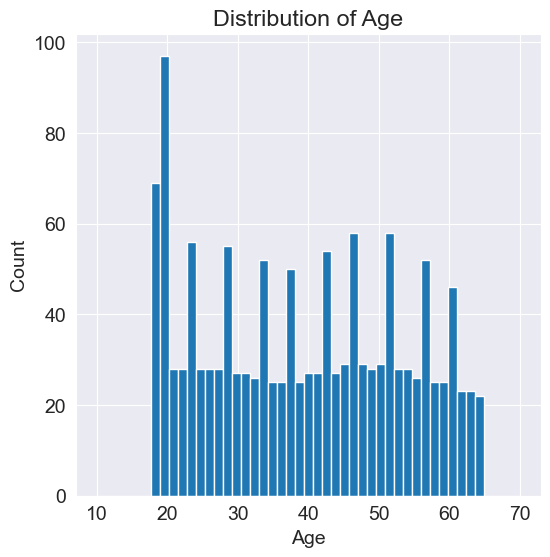

In [70]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.hist(x=medical_df['age'],bins=47,range=(10,70))
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

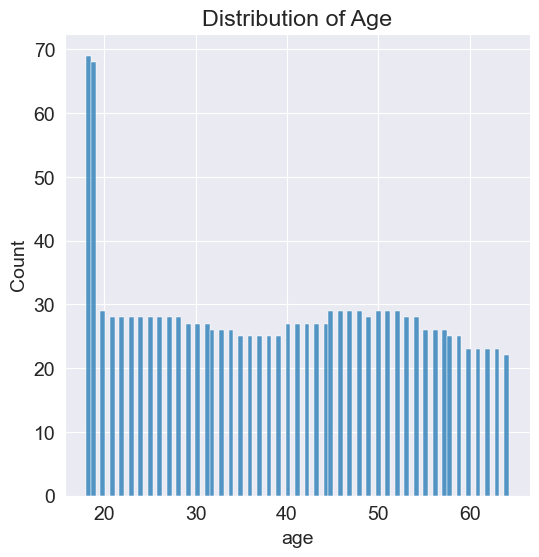

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='age',bins=47,binwidth=.52,legend=True)
plt.title("Distribution of Age")
plt.show()

### 2. Body Mass Index

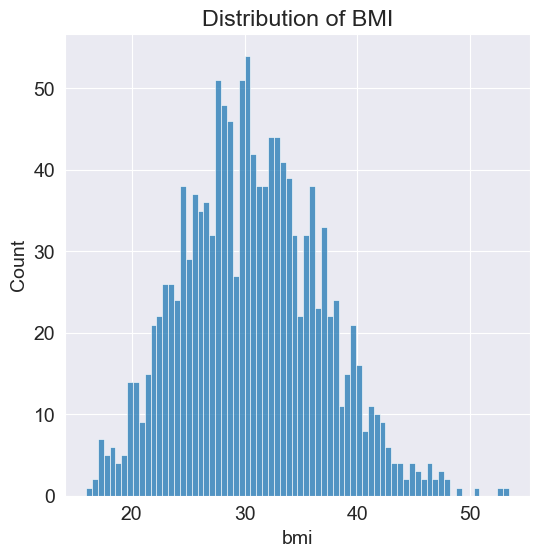

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='bmi',bins=47,binwidth=.52,legend=True)
plt.title("Distribution of BMI")
plt.show()

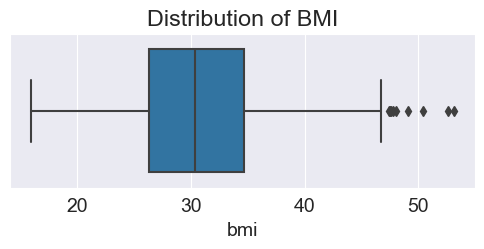

In [73]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxplot(medical_df,x='bmi')
plt.title("Distribution of BMI")
plt.show()

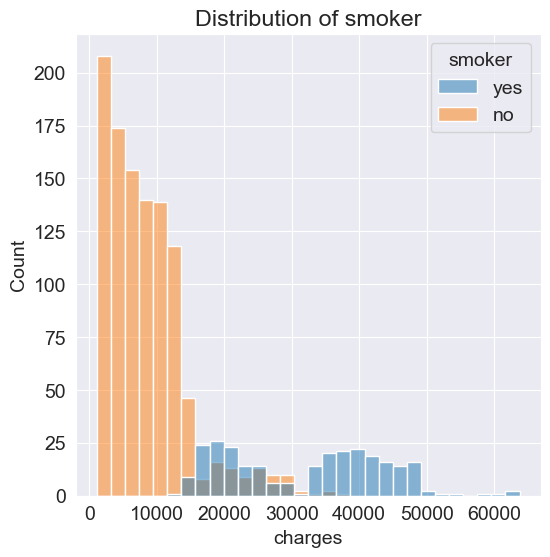

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='charges',hue='smoker',legend=True)
plt.title("Distribution of smoker")
plt.show()

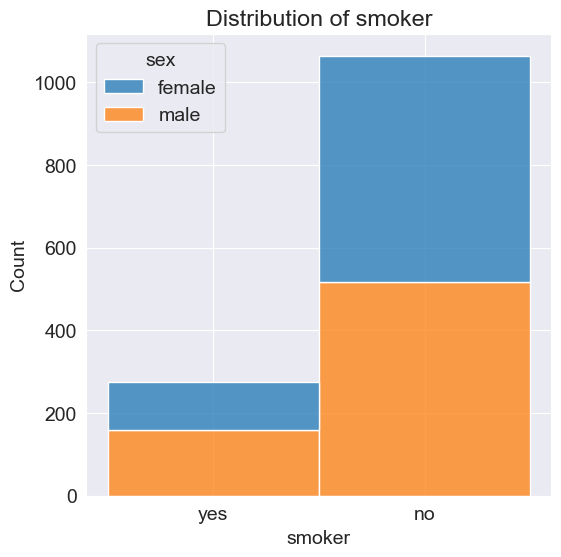

In [75]:
# px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='smoker',hue='sex',multiple='stack',legend=True)
plt.title("Distribution of smoker")
plt.show()


### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

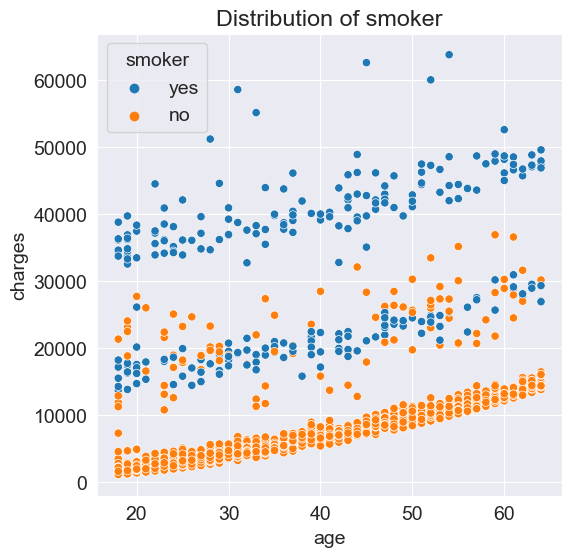

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(medical_df,y='charges',x='age',hue='smoker')
plt.title("Age v/s charges")
plt.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

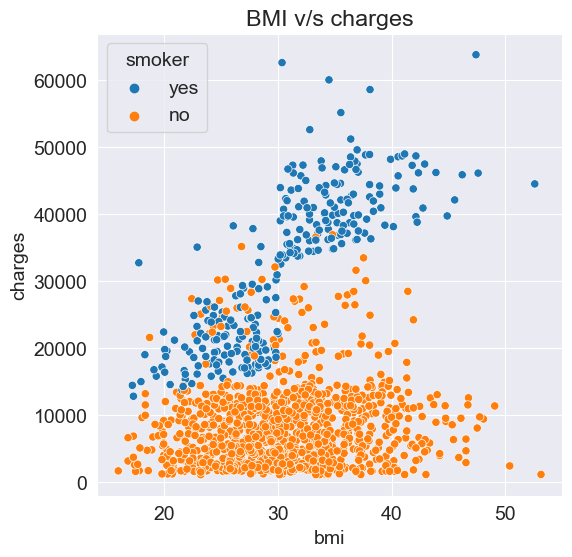

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(medical_df,y='charges',x='bmi',hue='smoker')
plt.title("BMI v/s charges")
plt.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [83]:
medical_df['charges'].corr(medical_df['age']),medical_df['charges'].corr(medical_df['bmi'])

(0.2990081933306476, 0.19834096883362895)

In [87]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1333   NaN
1334   NaN
1335   NaN
1336   NaN
1337   NaN
Name: sex, Length: 1338, dtype: float64